# 2048 - stratégie gagnante - correction

Le jeu 2048 est assez simple et fut populaire en son temps. Comment imaginer une stratégie qui dépasser le 2048 ?

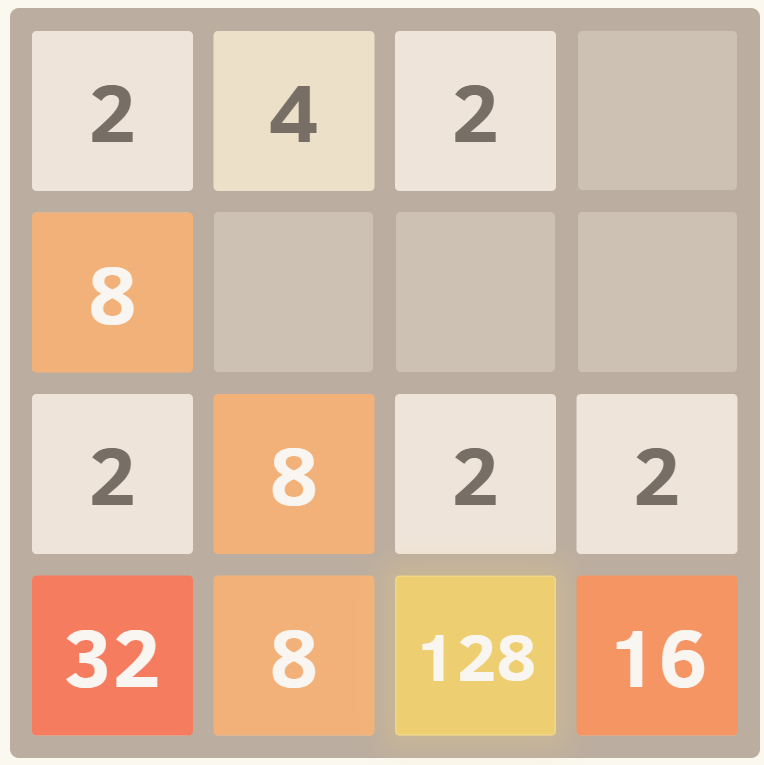

In [2]:
from IPython.display import Image

Image("2048.png", width=200)

## Exercice 1 : implémenter les règles du jeu

On veut pouvoir enchaîner les coups et simuler des parties. On crée plusieurs qu'on teste à chaque fois avant de passer à la suivante. La première fonction `create_game` crée un jeu vide.

In [3]:
import numpy


def create_game():
    return numpy.zeros((4, 4), dtype=int)


create_game()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

La seconde tire un nombre aléatoire et l'ajoute dans une case vide choisie au hasard s'il en reste. S'il n'en reste plus, le jeu est terminée. On utilise la fonction [ravel](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html) pour transformer la matrice en un tableau et vérifier qu'il y a des éléments nuls. C'est la fonction `gameover1` ou alors on peut utiliser la fonction [masked_not_equal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.masked_not_equal.html). C'est la fonction `gameover`.

In [4]:
import random


def gameover1(game):
    arr = game.ravel()
    arr = game[game == 0]
    return len(arr) == 0


def gameover(game):
    return numpy.ma.masked_not_equal(game, 0).count() == 0


def joue(game):
    if gameover(game):
        raise Exception("Game Over\n" + str(game))
    else:
        while True:
            i = random.randint(0, game.shape[0] - 1)
            j = random.randint(0, game.shape[1] - 1)
            if game[i, j] == 0:
                n = random.randint(0, 3)
                game[i, j] = 4 if n == 0 else 2
                break
    return game


game = create_game()
joue(game)

array([[2, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

On joue un second coup.

In [5]:
joue(game)

array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

On vérifie qu'au bout de 16 fois, la fonction génère une exception.

In [6]:
game = create_game()

iter = 0
while True:
    try:
        joue(game)
    except Exception as e:
        print("itération", iter)
        print(game)
        break
    iter += 1

itération 16
[[2 2 4 2]
 [2 4 2 2]
 [2 4 2 4]
 [4 2 4 2]]


Pour jouer un coup, il faut *faire tomber les nombres*. C'est la même chose quelque soit la colonne ou la ligne. On créer une fonction pour cela.

In [7]:
def process_line(line):
    res = []
    for n in line:
        if n == 0:
            # Un 0, on passe.
            continue
        if len(res) == 0:
            # Premier nombre, on ajoute au résultat.
            res.append(n)
        else:
            prev = res[-1]
            if prev == n:
                # Si le nombre est identique on combine.
                res[-1] = 2 * n
            else:
                # Sinon on ajoute.
                res.append(n)
    while len(res) < len(line):
        res.append(0)
    return res


process_line([2, 2, 4, 0])

[8, 0, 0, 0]

In [8]:
process_line([0, 2, 0, 0])

[2, 0, 0, 0]

On écrit la fonction de mise à jour pour les 4 directions et répétées 4 fois.

In [9]:
def update_game(game, direction):
    if direction == 0:
        lines = [process_line(game[i, :]) for i in range(game.shape[0])]
        game = numpy.array(lines)
    elif direction == 1:
        lines = [process_line(game[:, i]) for i in range(game.shape[1])]
        game = numpy.array(lines).T
    elif direction == 2:
        lines = [
            list(reversed(process_line(game[i, ::-1]))) for i in range(game.shape[0])
        ]
        game = numpy.array(lines)
    elif direction == 3:
        lines = [
            list(reversed(process_line(game[::-1, i]))) for i in range(game.shape[1])
        ]
        game = numpy.array(lines).T
    return game

On teste pour 5 coups.

In [10]:
game = create_game()
for i in range(0, 5):
    game = joue(game)
    print("-------------")
    print(game)
    direction = i % 4
    game = update_game(game, direction)
    print("direction=", direction)
    print(game)

-------------
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [2 0 0 0]]
direction= 0
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [2 0 0 0]]
-------------
[[0 0 0 0]
 [0 0 0 0]
 [0 2 0 0]
 [2 0 0 0]]
direction= 1
[[2 2 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
-------------
[[2 2 0 0]
 [0 0 0 0]
 [4 0 0 0]
 [0 0 0 0]]
direction= 2
[[0 0 0 4]
 [0 0 0 0]
 [0 0 0 4]
 [0 0 0 0]]
-------------
[[0 0 0 4]
 [0 0 0 4]
 [0 0 0 4]
 [0 0 0 0]]
direction= 3
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 4]
 [0 0 0 8]]
-------------
[[0 0 0 0]
 [4 0 0 0]
 [0 0 0 4]
 [0 0 0 8]]
direction= 0
[[0 0 0 0]
 [4 0 0 0]
 [4 0 0 0]
 [8 0 0 0]]


## Exercice 2 : implémenter une stratégie

*(à venir)*